In [1]:
import bz2
import json
from sklearn.model_selection import train_test_split 
import pandas
import time
import datetime
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import KFold
import pandas

In [2]:
def readFeaturesWithSums(jsonTest,test):
    res=[]
    #res.append(['match_id','r_xp_sum','d_xp_sum','r_gold_sum','d_gold_sum','r_lh_sum',
    #            'd_lh_sum','d_killers_count','r_killers_count'])
    res.append(['match_id','r_xp_sum','d_xp_sum','r_gold_sum','d_gold_sum','r_abil_sum','d_abil_sum'])
    #res.append(['match_id','r_xp_sum','d_xp_sum','r_gold_sum','d_gold_sum'])
    with bz2.BZ2File(jsonTest) as matches_file:
        for line in matches_file:
            match = json.loads(line)
            r_xp_sum=0
            d_xp_sum=0
            r_gold_sum=0
            d_gold_sum=0
            r_lh_sum=0
            d_lh_sum=0
            r_abil_sum=0
            d_abil_sum=0
            r_killers_count=len(match['players'][0]['kills_log'])
            +len(match['players'][1]['kills_log'])
            +len(match['players'][2]['kills_log'])
            +len(match['players'][3]['kills_log'])
            +len(match['players'][4]['kills_log'])
            d_killers_count=len(match['players'][5]['kills_log'])
            +len(match['players'][6]['kills_log'])
            +len(match['players'][7]['kills_log'])
            +len(match['players'][8]['kills_log'])
            +len(match['players'][9]['kills_log'])
            
            
            r_abil_sum=len(match['players'][0]['ability_upgrades'])
            +len(match['players'][1]['ability_upgrades'])
            +len(match['players'][2]['ability_upgrades'])
            +len(match['players'][3]['ability_upgrades'])
            +len(match['players'][4]['ability_upgrades'])
            d_abil_sum=len(match['players'][5]['ability_upgrades'])
            +len(match['players'][6]['ability_upgrades'])
            +len(match['players'][7]['ability_upgrades'])
            +len(match['players'][8]['ability_upgrades'])
            +len(match['players'][9]['ability_upgrades'])
                       
            for i in range(len(match['times'])):
                if(match['times'][i]<=5*60):
                    r_xp_sum=match['players'][0]['xp_t'][i]+match['players'][1]['xp_t'][i]+match['players'][2]['xp_t'][i]+match['players'][3]['xp_t'][i]+match['players'][4]['xp_t'][i]
        
                    d_xp_sum=match['players'][5]['xp_t'][i]\
                    +match['players'][6]['xp_t'][i]\
                    +match['players'][7]['xp_t'][i]\
                    +match['players'][8]['xp_t'][i]\
                    +match['players'][9]['xp_t'][i]
        
                    r_gold_sum=match['players'][0]['gold_t'][i]\
                    +match['players'][1]['gold_t'][i]\
                    +match['players'][2]['gold_t'][i]\
                    +match['players'][3]['gold_t'][i]\
                    +match['players'][4]['gold_t'][i]
        
                    d_gold_sum=match['players'][5]['gold_t'][i]\
                    +match['players'][6]['gold_t'][i]\
                    +match['players'][7]['gold_t'][i]\
                    +match['players'][8]['gold_t'][i]\
                    +match['players'][9]['gold_t'][i]
     
                    r_lh_sum=match['players'][0]['lh_t'][i]\
                    +match['players'][1]['lh_t'][i]\
                    +match['players'][2]['lh_t'][i]\
                    +match['players'][3]['lh_t'][i]\
                    +match['players'][4]['lh_t'][i]
        
                    d_lh_sum=match['players'][5]['lh_t'][i]\
                    +match['players'][6]['lh_t'][i]\
                    +match['players'][7]['lh_t'][i]\
                    +match['players'][8]['lh_t'][i]\
                    +match['players'][9]['lh_t'][i]
            #res.append([match['match_id'],r_xp_sum,d_xp_sum,r_gold_sum,d_gold_sum,
            #            r_lh_sum,d_lh_sum,d_killers_count,d_killers_count])
            res.append([match['match_id'],r_xp_sum,d_xp_sum,r_gold_sum,d_gold_sum,r_abil_sum,d_abil_sum])
            #res.append([match['match_id'],r_xp_sum,d_xp_sum,r_gold_sum,d_gold_sum])
    import csv
    with open('tmp.csv', 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
        spamwriter.writerows(res)
    features = pandas.read_csv(test)    
    s = pandas.read_csv('./tmp.csv', index_col='match_id')
    result = pandas.merge(features, s, left_on='match_id', right_index=True, how='left', sort=False)
    return result

In [34]:
#features=pandas.read_csv('features.csv')
#test=pandas.read_csv('features_test.csv')
test=readFeaturesWithSums('matches_test.jsonlines.bz2','features_test.csv')
print('test')
features=readFeaturesWithSums('matches.jsonlines.bz2','features.csv')
print('features')
features.fillna(9999999,inplace=True)
test.fillna(9999999,inplace=True)
y=features['radiant_win']
features=features.drop(['duration','radiant_win','tower_status_radiant',
              'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)
#features=features.drop(['duration','tower_status_radiant',
#              'tower_status_dire','barracks_status_radiant','barracks_status_dire'],axis=1)
clf=GradientBoostingClassifier(n_estimators=200, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(features, y,test_size=0.2,random_state=42)
#clf.fit(X_train,y_train)
#pred=clf.predict_proba(X_test)[:,1]
#clf.fit(features,y)
#print('fit, yea')
#print(roc_auc_score(y_test,pred))
#print(getMetrics(200))
'''total=[]
total.append(["match_id","radiant_win"])
for i in range(0,len(match_id)):
    total.append([match_id[i],pred[i]])
import csv
with open('res.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(total)
('done')'''

test
features


'total=[]\ntotal.append(["match_id","radiant_win"])\nfor i in range(0,len(match_id)):\n    total.append([match_id[i],pred[i]])\nimport csv\nwith open(\'res.csv\', \'w\', newline=\'\') as csvfile:\n    spamwriter = csv.writer(csvfile, delimiter=\',\',\n                            quotechar=\'|\', quoting=csv.QUOTE_MINIMAL)\n    spamwriter.writerows(total)\n(\'done\')'

array(['match_id', 'start_time', 'lobby_type', 'r1_hero', 'r1_level',
       'r1_xp', 'r1_gold', 'r1_lh', 'r1_kills', 'r1_deaths', 'r1_items',
       'r2_hero', 'r2_level', 'r2_xp', 'r2_gold', 'r2_lh', 'r2_kills',
       'r2_deaths', 'r2_items', 'r3_hero', 'r3_level', 'r3_xp', 'r3_gold',
       'r3_lh', 'r3_kills', 'r3_deaths', 'r3_items', 'r4_hero', 'r4_level',
       'r4_xp', 'r4_gold', 'r4_lh', 'r4_kills', 'r4_deaths', 'r4_items',
       'r5_hero', 'r5_level', 'r5_xp', 'r5_gold', 'r5_lh', 'r5_kills',
       'r5_deaths', 'r5_items', 'd1_hero', 'd1_level', 'd1_xp', 'd1_gold',
       'd1_lh', 'd1_kills', 'd1_deaths', 'd1_items', 'd2_hero', 'd2_level',
       'd2_xp', 'd2_gold', 'd2_lh', 'd2_kills', 'd2_deaths', 'd2_items',
       'd3_hero', 'd3_level', 'd3_xp', 'd3_gold', 'd3_lh', 'd3_kills',
       'd3_deaths', 'd3_items', 'd4_hero', 'd4_level', 'd4_xp', 'd4_gold',
       'd4_lh', 'd4_kills', 'd4_deaths', 'd4_items', 'd5_hero', 'd5_level',
       'd5_xp', 'd5_gold', 'd5_lh', 'd5_kills

In [42]:
clf=GradientBoostingClassifier(n_estimators=200, random_state=42)
clf.fit(features,y)
pred=clf.predict_proba(test)[:,1]
match_id=pandas.read_csv('./features_test.csv')['match_id']
total=[]
total.append(["match_id","radiant_win"])
for i in range(0,len(match_id)):
    total.append([match_id[i],pred[i]])
import csv
with open('answer.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(total)

In [18]:
#Repeat good models
d_features=features
d_y=y
d_test=test
d_clf=GradientBoostingClassifier(n_estimators=180, random_state=42,max_depth=7)
d_clf.fit(d_features,d_y)
d_pred=d_clf.predict_proba(d_test)[:,1]
d_match_id=pandas.read_csv('./features_test.csv')['match_id']
d_total=[]
d_total.append(["match_id","radiant_win"])
for i in range(0,len(d_match_id)):
    d_total.append([d_match_id[i],d_pred[i]])
import csv
with open('d_res.csv', 'w', newline='') as csvfile:
    d_spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    d_spamwriter.writerows(d_total)

In [33]:
def getMetrics(n):
    auc_roc=0;
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    clf=GradientBoostingClassifier(n_estimators=n, random_state=42)
    for train,test in kf.split(features,y):
        clf.fit(features.iloc[train],y.iloc[train])
        pred=clf.predict_proba(features.iloc[test])[:,1]
        auc_roc+=roc_auc_score(y.iloc[test],pred)
    return auc_roc/5;

C:\Users\matepaev\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


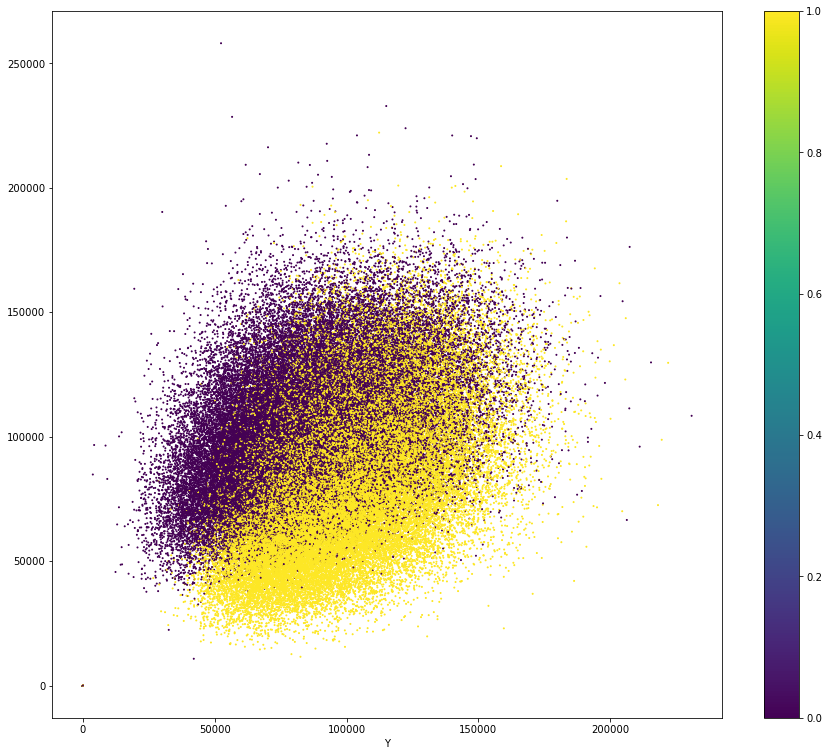

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
x=features.r_gold_sum*features.r_abil_sum;

y=features.d_gold_sum*features.d_abil_sum;

Cluster=np.array(features.radiant_win)
#centers=np.random.randn(4,2)
fig=plt.figure(figsize=(15,13))
ax=fig.add_subplot(111)
scatter=ax.scatter(x,y,c=Cluster,s=1)
#for i,j in centers:
#    ax.scatter(i,j,s=50,c='red',marker='+')
ax.set_xlabel('X')
ax.set_xlabel('Y')
plt.colorbar(scatter)
fig.show()

In [72]:
features

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,radiant_win,r_xp_sum,d_xp_sum,r_gold_sum,d_gold_sum,r_abil_sum,d_abil_sum
0,0,1430198770,7,11,5,2098,1489,20,0,0,...,2,2,-52.0,1,6338,5895,5022,5021,25,18
1,1,1430220345,0,42,4,1188,1033,9,0,1,...,3,1,-5.0,1,5374,5230,4698,5505,17,17
2,2,1430227081,7,33,4,1319,1270,22,0,0,...,3,1,13.0,0,7685,6753,6677,5786,13,22
3,3,1430263531,1,29,4,1779,1056,14,0,0,...,2,0,27.0,0,5658,5475,4308,4729,12,13
4,4,1430282290,7,13,4,1431,1090,8,1,0,...,3,0,-16.0,0,5351,5862,4888,5068,17,19
5,5,1430284186,1,11,5,1961,1461,19,0,1,...,4,0,-43.0,0,5603,5675,5170,7014,14,14
6,8,1430293701,1,8,3,967,1136,7,1,0,...,3,0,10.0,0,5721,7108,5565,6981,14,17
7,9,1430299335,7,35,5,2117,1252,16,0,0,...,4,0,-15.0,1,4936,5778,4500,5094,23,22
8,11,1430308974,1,17,5,1527,906,10,0,1,...,4,0,26.0,0,5080,6212,4440,5143,18,14
9,12,1430316105,7,15,5,1651,1060,14,0,1,...,2,0,16.0,0,5631,6179,4405,5554,17,24
